<a href="https://colab.research.google.com/github/minnjeee/SWcamp/blob/main/12_%EB%94%A5%EB%9F%AC%EB%8B%9D/ex04)_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%86%90%EA%B8%80%EC%94%A8_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목표
- 0 ~ 9 까지의 손글씨 이미지 데이터를 분류하는 신경망 모델을 만들어보자!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# iris 데이터셋 임포트
from tensorflow.keras.datasets import mnist
# mnist(Modified National Institute of Standards and Technology), Nist : 미국표준기술연구소

In [ ]:
data = mnist.load_data()

In [ ]:
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
len(data) # 2개의 arrary로 이루어짐!

2

In [ ]:
# 데이터가 3차원 배열로 크게는 train,test로 나뉘어져 있고,
# 각 train,test 안에 문제와 정답으로 한번 더 나뉘어져 있음
(X_train, y_train), (X_test, y_test) = data

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# 이미지라는 2차원 데이터를 다루기 때문에 shape의 형태는 3칸이 나오게됨
# (데이터의 수, 세로픽셀수, 가로픽셀수)

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

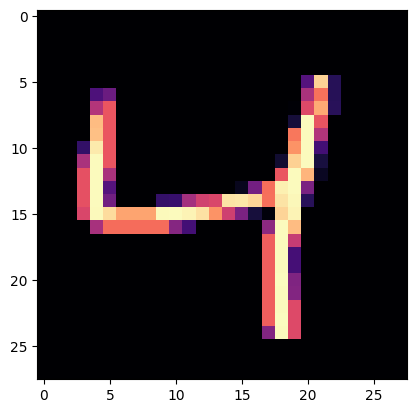

In [ ]:
plt.imshow(X_train[2], cmap='magma');
# imshow : 이미지 데이터를 그림으로 출력해주는 함수
# cmap='gray' : 이미지를 흑백으로 전환시켜주는 인자
# 뒤에 ; 붙이면 이미지만 출력됨

In [ ]:
print(X_train[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

### 정답 데이터 원핫인코딩
- pd.get_dummies : 판다스 지원 원핫인코딩 -> 결과 형태는 데이터프레임
- to_categorical : keras에서 지원 원핫인코딩 -> 결과 형태는 배열

In [ ]:
pd.get_dummies(y_train)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,1,0
59996,0,0,0,1,0,0,0,0,0,0
59997,0,0,0,0,0,1,0,0,0,0
59998,0,0,0,0,0,0,1,0,0,0


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
y_train_one_hot.shape, y_test_one_hot.shape

((60000, 10), (10000, 10))

- 인공신경망에는 2차원인 이미지데이터를 한번에 넣은 수 없기 때문에 데이터의 차원을 전부 1차원으로 변경시켜준 뒤 학습시켜야함!

In [ ]:
X_train = X_train.reshape(60000,-1)
# -1 은 60000을 제외한 나머지값들을 다 곱해서 하나의 차원으로 만들어줌
X_test = X_test.reshape(10000,-1)

In [ ]:
X_train.shape, X_test.shape
# 이미지는 픽셀 하나하나가 데이터의 특성으로 인식

((60000, 784), (10000, 784))

## 신경망 모델링
- 직접 모델링 해보자!

In [ ]:
# 입력되는 특성 수 : 784
# 출력층 활성화함수, 뉴런수
# loss함수
# 최적화함수 (SGD, Adam 둘 다 사용해보기)

# 이미지는 학습시간이 오래 걸림 -> 런타임 유형 변경하기(CPU -> T4 GPU)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=784, activation='sigmoid'))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(150, activation='sigmoid'))
model.add(Dense(80, activation='sigmoid'))
model.add(Dense(40, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [ ]:
h = model.fit(X_train, y_train_one_hot, epochs=30,
              batch_size=128, # 한 번에 학습되는 데이터의 개수 (기본값은 32개)
              verbose=2 # 학습 결과 출력 형태 - 0은 학습끝날 때까지 진행상황 안보여줌, 2는 좀더 간단하게 bar없이 표현 (기본값 1, bar형태)
              )

Epoch 1/30
469/469 - 3s - loss: 1.3574 - acc: 0.5317 - 3s/epoch - 7ms/step
Epoch 2/30
469/469 - 2s - loss: 0.6396 - acc: 0.8093 - 2s/epoch - 4ms/step
Epoch 3/30
469/469 - 2s - loss: 0.4901 - acc: 0.8545 - 2s/epoch - 4ms/step
Epoch 4/30
469/469 - 2s - loss: 0.4054 - acc: 0.8809 - 2s/epoch - 3ms/step
Epoch 5/30
469/469 - 2s - loss: 0.3631 - acc: 0.8916 - 2s/epoch - 3ms/step
Epoch 6/30
469/469 - 2s - loss: 0.3478 - acc: 0.8952 - 2s/epoch - 3ms/step
Epoch 7/30
469/469 - 1s - loss: 0.3226 - acc: 0.9031 - 1s/epoch - 3ms/step
Epoch 8/30
469/469 - 2s - loss: 0.2974 - acc: 0.9108 - 2s/epoch - 3ms/step
Epoch 9/30
469/469 - 1s - loss: 0.2868 - acc: 0.9133 - 1s/epoch - 3ms/step
Epoch 10/30
469/469 - 2s - loss: 0.2824 - acc: 0.9163 - 2s/epoch - 4ms/step
Epoch 11/30
469/469 - 2s - loss: 0.2618 - acc: 0.9208 - 2s/epoch - 3ms/step
Epoch 12/30
469/469 - 1s - loss: 0.2528 - acc: 0.9232 - 1s/epoch - 3ms/step
Epoch 13/30
469/469 - 2s - loss: 0.2497 - acc: 0.9231 - 2s/epoch - 3ms/step
Epoch 14/30
469/469 -

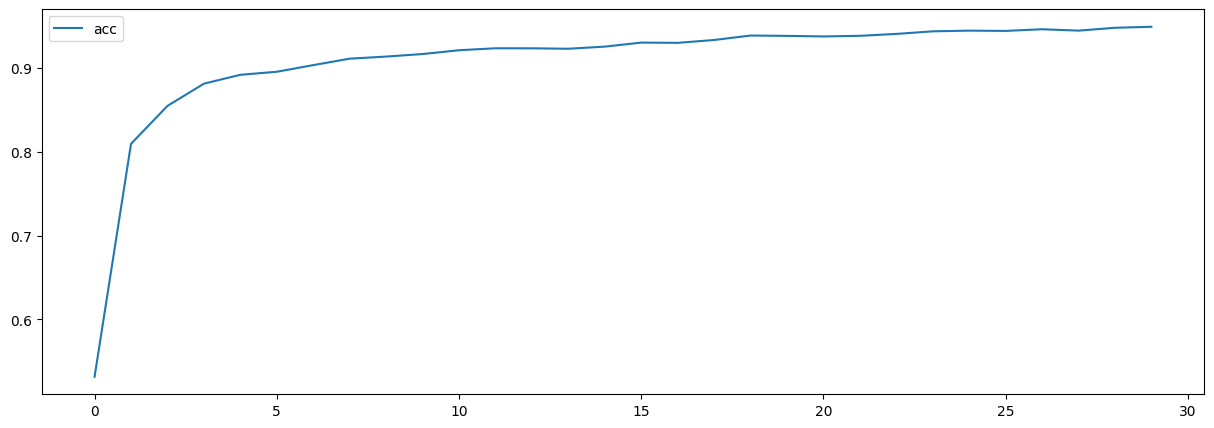

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(h.history['acc'], label='acc')

plt.legend()
plt.show()

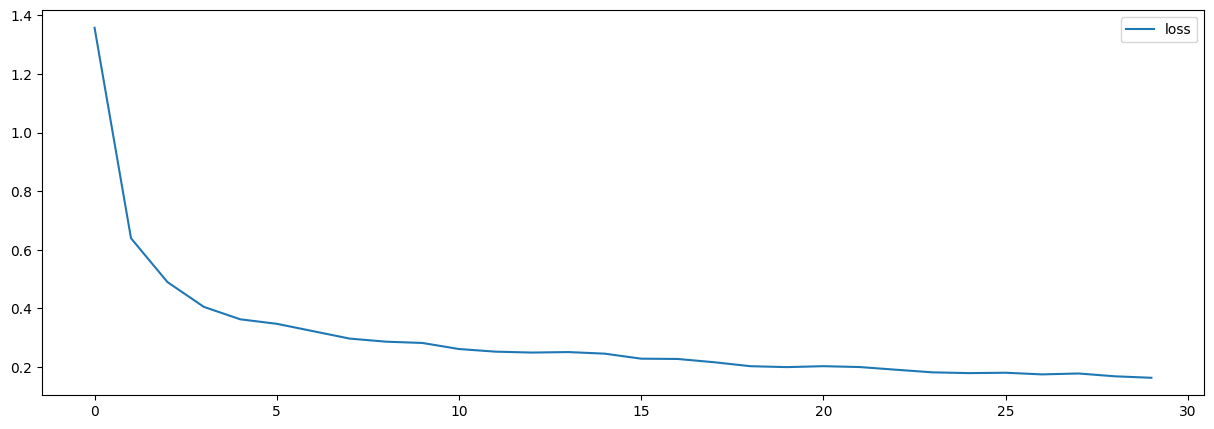

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(h.history['loss'], label='loss')

plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.1773 - acc: 0.9470


[0.17726841568946838, 0.9470000267028809]

## 과대적합을 확인하기 위해 train데이터에서 validation데이터를 분리해서 학습 시 같이 출력해보자!

In [ ]:
# 무조건 train,test만 나눠주는 게 아니라, 데이터를 일정 비율로 랜덤하게 나눠주는 기능을 갖고 있음
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train_one_hot, y_val_one_hot = train_test_split(X_train, y_train_one_hot, random_state=33)

In [ ]:
X_train.shape, X_val.shape, y_train_one_hot.shape, y_val_one_hot.shape

((45000, 784), (15000, 784), (45000, 10), (15000, 10))

In [ ]:
model1 = Sequential()
model1.add(Dense(100, input_dim=784, activation='sigmoid'))
model1.add(Dense(200, activation='sigmoid'))
model1.add(Dense(150, activation='sigmoid'))
model1.add(Dense(80, activation='sigmoid'))
model1.add(Dense(40, activation='sigmoid'))
model1.add(Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [ ]:
h1 = model1.fit(X_train, y_train_one_hot,
                epochs=30, batch_size=128,
                validation_data=(X_val, y_val_one_hot) # 검증용 데이터셋 추가
                )

Epoch 1/30
352/352 [==============================] - 5s 7ms/step - loss: 1.6815 - acc: 0.3603 - val_loss: 1.1368 - val_acc: 0.5841
Epoch 2/30
352/352 [==============================] - 2s 5ms/step - loss: 0.8444 - acc: 0.7295 - val_loss: 0.6297 - val_acc: 0.8228
Epoch 3/30
352/352 [==============================] - 2s 5ms/step - loss: 0.5636 - acc: 0.8352 - val_loss: 0.5205 - val_acc: 0.8449
Epoch 4/30
352/352 [==============================] - 2s 7ms/step - loss: 0.4758 - acc: 0.8599 - val_loss: 0.4642 - val_acc: 0.8659
Epoch 5/30
352/352 [==============================] - 2s 5ms/step - loss: 0.4347 - acc: 0.8747 - val_loss: 0.4289 - val_acc: 0.8762
Epoch 6/30
352/352 [==============================] - 2s 5ms/step - loss: 0.4066 - acc: 0.8816 - val_loss: 0.4101 - val_acc: 0.8787
Epoch 7/30
352/352 [==============================] - 2s 7ms/step - loss: 0.3975 - acc: 0.8831 - val_loss: 0.3784 - val_acc: 0.8884
Epoch 8/30
352/352 [==============================] - 2s 6ms/step - loss: 0.

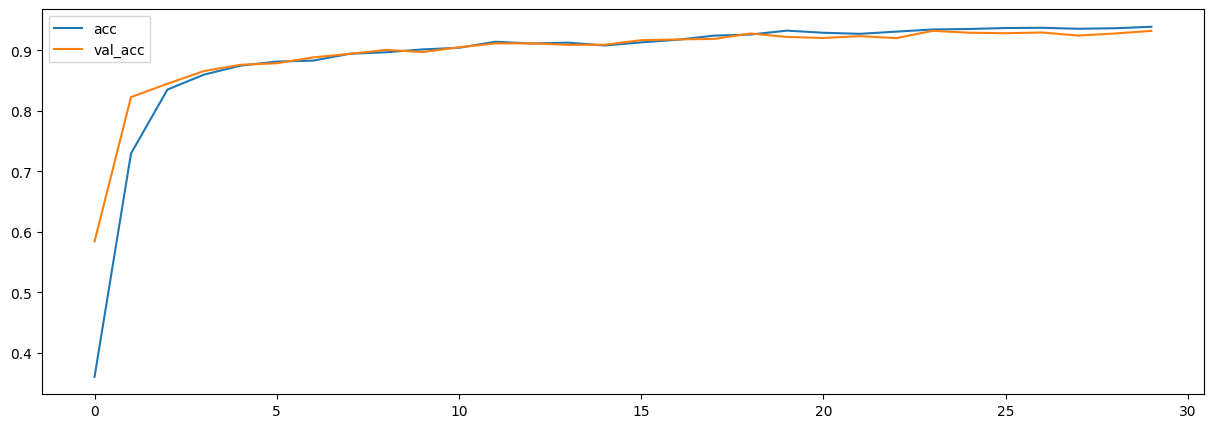

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(h1.history['acc'], label='acc') # train데이터
plt.plot(h1.history['val_acc'], label='val_acc') # validation 데이터

plt.legend()
plt.show()